# **Data Modeling - Otto Group product classification**

After cleaning and doing the needed transformation in the Data Wrangling phase, let us now try to see what story our data tells. What interesting questions can we ask. Our final goal is to classify the products into one of the 9 product categories. So we should see the different features and which of them can be most significant or relevant for our purpose.

[Load the cleaned daat from previous work (ipynb)](#section1)

[Do we have same amount of data for all product categories?](#section2)

[What does the feature data look like?](#section3)

[How are the features related to each other?](#section4)

[How about more visulizations to understand the data better?](#section5)


<a id='section1'></a>

In [42]:
# pandas gives high-performance, easy-to-use data structures and data analysis tools
import pandas as pd

# fundamental package for scientific computing
import numpy as np 

# matplotlib provides a MATLAB-like plotting framework
import matplotlib.pyplot as plt
import matplotlib

# seaborn is visualization library based on matplotlib, 
# provides high level interface for drawing attractive statistical graphics
import seaborn as sns
sns.set_style(style='whitegrid')

# for ANOVA
import scipy.stats as stats

In [43]:
# training data set
pca_df = pd.read_csv("../data/train_norm_pca.csv")

# test data set
#df_test = pd.read_csv("../data/test_cleaned.csv")

In [44]:
pca_df.head()

,0,1,2,3,4,5,6,7,8,9,...,84,85,86,87,88,89,90,91,92,target
0,-0.322226,0.261640,-0.101271,2.371336,-1.969393,0.606056,-0.519601,0.807828,-0.128615,0.343750,...,0.394135,-0.157771,-0.199786,-0.311419,0.541050,0.069015,-0.184542,-0.046575,0.097835,1
1,-1.617733,-0.431757,-1.121202,0.293595,-0.614387,0.339935,0.290450,0.032317,-0.690445,0.123639,...,0.038507,-0.329023,0.138695,0.000430,-0.054634,-0.050181,0.101434,-0.006674,0.030508,1
2,-1.529818,-0.013893,-0.474269,0.540099,-0.183968,0.457895,0.391766,0.085182,-0.853228,-0.273631,...,0.141192,-0.401972,0.260889,-0.368088,0.430489,0.059703,-0.128953,0.044839,0.122280,1
3,5.970171,5.383945,-0.781070,7.071108,14.264728,18.608579,18.657943,1.073235,17.123522,12.116826,...,1.302866,-0.870315,0.293537,-6.060343,-8.091420,1.776618,-6.930132,-0.125727,-0.720418,1
4,-1.215508,0.447809,-0.359539,1.150645,-0.340307,0.464952,0.590288,0.242088,-1.623147,-0.621531,...,0.099250,0.053953,-0.119258,0.483242,-0.163679,-0.056049,0.103245,-0.036500,0.234712,1


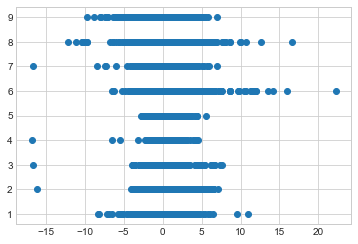

In [45]:
plt.scatter(pca_df.iloc[:,33],pca_df.target)
plt.show()

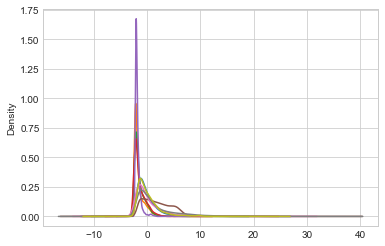

In [46]:
for i in np.arange(1,10):
    pca_df[pca_df.target==i].iloc[:,0].plot(kind="kde")
plt.show()

In [108]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(penalty='l2',random_state=42) #empty model space
X = pca_df.iloc[:,0:10]
y = pca_df.target
lr = logreg.fit(X=X,y=y)
lr.score(X=X,y=y)

0.67164420310934414

In [109]:
from sklearn.model_selection import GridSearchCV

# for 10 features
cv = GridSearchCV(lr, param_grid={'C':[0.01,0.03,0.1,0.3,1,3,10,30]})

# for 50 features
#cv = GridSearchCV(lr, param_grid={'C':[1000,300,100,30,10]})
#cv = GridSearchCV(lr, param_grid={'C':[1,10,30,100,300]},cv=5)



In [110]:
cv.fit(X=X,y=y)

GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [111]:
cv.best_estimator_

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [112]:
cv.score(X=X,y=y)

0.6714825947832832

In [113]:
from sklearn.metrics import log_loss
y_pred = cv.predict_proba(X=X)
log_loss(pca_df.target, y_pred)

1.0203366276474723

In [115]:
y_pred

array([[ 0.05238633,  0.01480631,  0.0074382 , ...,  0.03351235,
         0.06486621,  0.07520738],
       [ 0.04849785,  0.17259544,  0.09331318, ...,  0.0659803 ,
         0.17816279,  0.04090971],
       [ 0.06586756,  0.21513936,  0.12044236, ...,  0.07177094,
         0.15650931,  0.07490654],
       ..., 
       [ 0.03725533,  0.1929224 ,  0.02051278, ...,  0.01517306,
         0.00704898,  0.69656862],
       [ 0.03801481,  0.04761505,  0.002242  , ...,  0.0011988 ,
         0.02851327,  0.57224021],
       [ 0.0515048 ,  0.0183687 ,  0.0017009 , ...,  0.00248631,
         0.0721793 ,  0.64637461]])